# Analysis of Yandex.Afisha data

**Research objective:**
- To draw conclusions on cost optimization - to determine the most effective/ineffective

## 1. Overview of data

In [1]:
import pandas as pd
import seaborn as sns
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot as plt

/Users/yusuf/opt/anaconda3/envs/praktikum_env_macos2/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pd.set_option('max_colwidth', 400)
sns.set(rc={'figure.figsize':(16, 7)})

In [3]:
visits = pd.read_csv('/Users/yusuf/Desktop/Programming/Projects/Data/visits_log.csv')
orders = pd.read_csv('/Users/yusuf/Desktop/Programming/Projects/Data/orders_log.csv')
costs = pd.read_csv('/Users/yusuf/Desktop/Programming/Projects/Data/costs.csv')

### 1.1 Website visits

In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [5]:
visits.duplicated().sum()

0

In [6]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


- No duplicates or omissions detected. We need to change the format of the date/time of the beginning and end of the session to the correct one, rename the columns

### 1.2 Orders from the website

In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [8]:
orders.duplicated().sum()

0

In [9]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


- No duplicates or omissions detected. I will change the purchase date/time format to correct, rename the columns

### 1.3 Spending on the website

In [10]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [11]:
costs.duplicated().sum()

0

In [12]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


- No duplicates or omissions detected. Replacing the date format of the promotion with the correct one

## 2. Data preprocessing

In [13]:
visits['End Ts'] = pd.to_datetime(visits['End Ts'], format="%Y-%m-%d %H:%M")
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'], format="%Y-%m-%d %H:%M")

In [14]:
visits.rename(columns={'End Ts': 'session_end', 'Start Ts': 'session_start', 'Source Id': 'source_id'}, inplace=True)
visits.columns = map(str.lower, visits.columns)

In [15]:
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'], format = "%Y-%m-%d %H:%M")

In [16]:
orders.rename(columns={'Buy Ts': 'purchase_time'}, inplace=True)
orders.columns = map(str.lower, orders.columns)

In [17]:
costs['dt'] = costs['dt'].astype('datetime64')

**Interim conclusion:**

All data are in the appropriate format. The units of measure for costs and expenses are c.u. 

## 3. Calculation of metrics and graph construction

### 3.1 Product metrics

#### 3.1.1 DAU, WAU, MAU

I will calculate the number of unique users per day, week and month, previously allocating in separate columns month, year, week and day of the first connection

In [18]:
visits['session_year'] = visits['session_start'].dt.year
visits['session_month'] = visits['session_start'].dt.month
visits['session_week'] = visits['session_start'].dt.week
visits['session_date'] = visits['session_start'].dt.date
visits['session_day'] = visits['session_start'].dt.day

In [19]:
dau = visits.groupby('session_date').agg({'uid': 'nunique'})
wau = (visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}))
mau = (visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}))

I will calculate the average of the indicators

In [20]:
print('The number of unique users per day:', dau.mean().astype('int'))
print('The number of unique users per week:', wau.mean().astype('int'))
print('The number of unique users per month:', mau.mean().astype('int'))

The number of unique users per day: uid    907
dtype: int64
The number of unique users per week: uid    5716
dtype: int64
The number of unique users per month: uid    23228
dtype: int64


I will draw graphs of changes in these indicators over time

Text(0, 0.5, 'Users, units.')

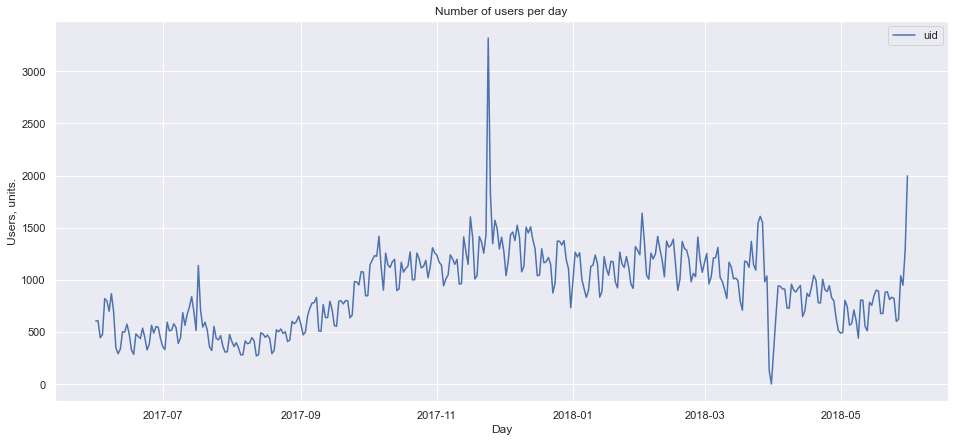

In [21]:
dau.plot(grid=True)
plt.title('Number of users per day')
plt.xlabel('Day')
plt.ylabel('Users, units.')

By day, users show a value of 500 in the summer, increasing to 1000 in the fall and showing a jump closer to December. After that, they go down a bit.

Text(0, 0.5, 'Users, units')

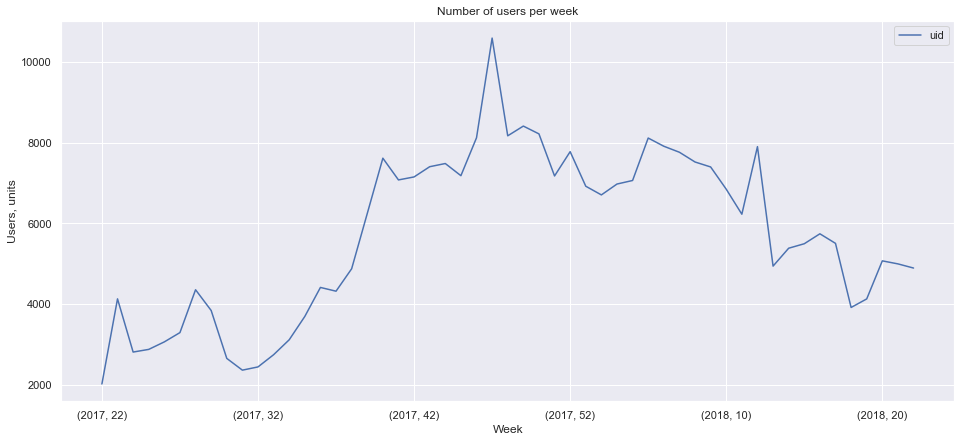

In [22]:
wau.plot(grid=True)
plt.title('Number of users per week')
plt.xlabel('Week')
plt.ylabel('Users, units')

Weekly figures also show growth in users by the end of the year

Text(0, 0.5, 'Users, units')

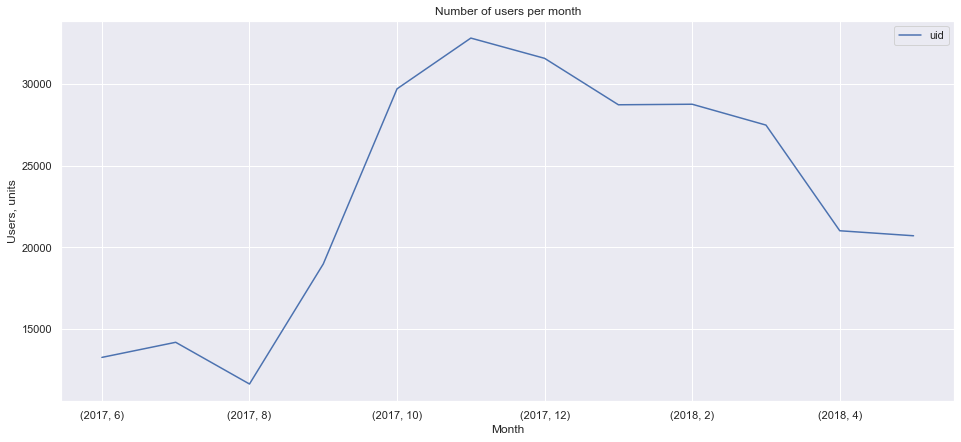

In [23]:
mau.plot(grid=True)
plt.title('Number of users per month')
plt.xlabel('Month')
plt.ylabel('Users, units')

Monthly figures clearly show growth from August (about 10,000 users) to November (about 35,000 users), with a subsequent decline to 20,000 users by May

**Interim conclusion:**

The number of unique users per month slightly exceeds 20,000, with a jump in users in late November and early December 2017

#### 3.1.2 How many times a day a user visits the site on average

Determine the average number of sessions per day

In [24]:
count_date_session = visits.groupby('session_date').agg({'uid': 'count'}).mean()
print("Number of session per day {0:.2f} ".format(count_date_session[0]))

Number of session per day 987.36 


Determine how many times a day users on average visit the site. To do this, divide the total number of daily sessions by the number of unique users who come to the site per day.

In [25]:
count_users_session = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()

sessions_per_user = count_date_session / count_users_session

In [26]:
sessions_per_user = visits.groupby('session_date').agg({'uid': ['count', 'nunique']}).reset_index()
sessions_per_user.columns = ['session_date', 'n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = (sessions_per_user['n_sessions'] / sessions_per_user['n_users'])

In [27]:
users_sessions_mean = sessions_per_user['sessions_per_user'].mean()
print("Average number of sessions per day per user - {0:.2f} ".format(users_sessions_mean))

Average number of sessions per day per user - 1.08 


Text(0, 0.5, 'Sessions, unit')

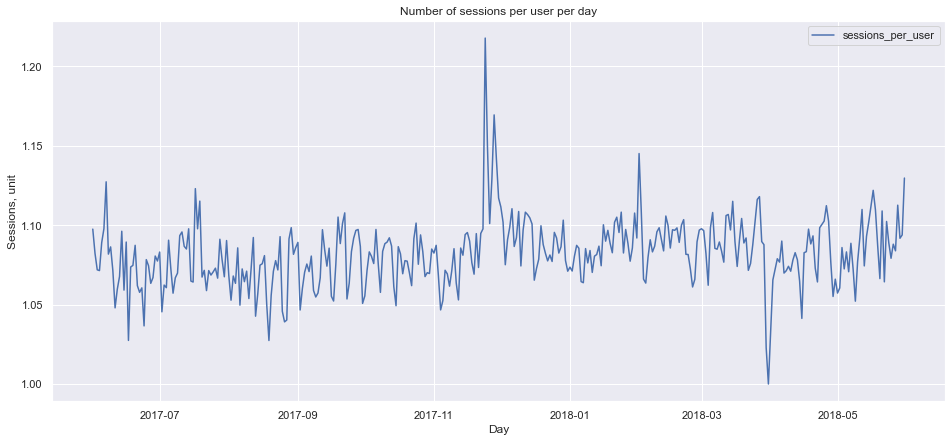

In [28]:
sessions_per_user.plot(x='session_date', y='sessions_per_user', kind='line', grid=True)
plt.title('Number of sessions per user per day')
plt.xlabel('Day')
plt.ylabel('Sessions, unit')

The number of sessions per user is slightly above one with a spike in late November, early December and a drop in March.

**Interim Conclusion:**

Increase in the number of sessions at the beginning of the month and a spike at the end - may be due to the wages that users spend on entertainment

#### 3.1.3 How much time the user spends on the site

In [29]:
visits['session_duration_min'] = (
    visits['session_end'] - visits['session_start']
).dt.seconds / 60
visits['session_duration_min'].describe()

count    359400.000000
mean         10.725108
std          16.938913
min           0.000000
25%           2.000000
50%           5.000000
75%          14.000000
max        1408.000000
Name: session_duration_min, dtype: float64

One session lasts:

- 10 minutes on average

- On the median 5 minutes

- On mod 1 minute

In [30]:
visits['session_duration_min'].mode()

0    1.0
dtype: float64

Text(0.5, 1.0, 'Time spent on the site (minutes)')

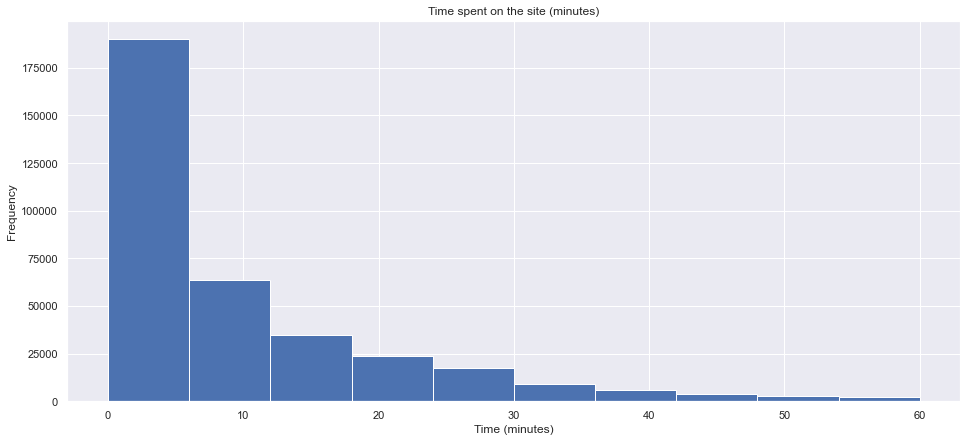

In [31]:
ax = visits['session_duration_min'].hist(bins=10, range=(0, 60))
ax.set_xlabel('Time (minutes)')
ax.set_ylabel('Frequency')
ax.set_title('Time spent on the site (minutes)')

Most of the sessions are within 10 minutes. In this case, since the distribution is not close to normal, the average measure is determined by mode, i.e., 1 minute.

#### 3.1.4 Retention Rate

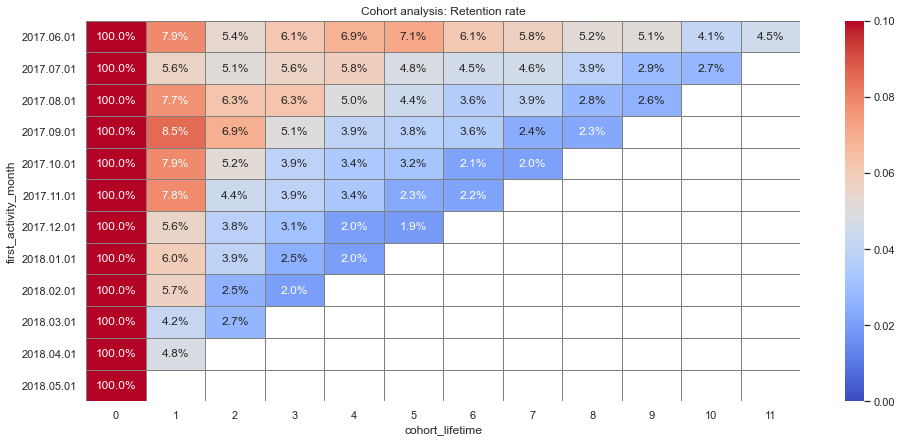

In [32]:
first_activity_date = visits.groupby('uid').agg({'session_start':'min'}).reset_index()
first_activity_date.columns = ['uid', 'first_activity_date']
visits = visits.merge(first_activity_date)

visits['first_activity_month'] = visits['first_activity_date'].astype('datetime64[M]')
visits['activity_month'] = visits['session_start'].astype('datetime64[M]')
visits['cohort_lifetime'] = (visits['activity_month'] - visits['first_activity_month']) / np.timedelta64(1, 'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype('int')

cohorts = visits.groupby(
    ['first_activity_month', 'cohort_lifetime']
).agg(
    {'uid': 'nunique'}
).reset_index()

initial_users_count = cohorts[cohorts['cohort_lifetime']==0][['first_activity_month', 'uid']]

initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})

cohorts = cohorts.merge(initial_users_count)
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users']

retention_pivot = cohorts.pivot_table(index='first_activity_month', columns='cohort_lifetime',
                                          values='retention', aggfunc='sum')

retention_pivot

sns.set(style='white')
plt.figure()
plt.title('Cohort analysis: Retention rate')
ax = sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmin = 0, vmax = 0.1, 
                 cmap = 'coolwarm', yticklabels=retention_pivot.index.strftime('%Y.%m.%d'));

The percentage of withholding decreases from month to month, with few exceptions

In [33]:
second_cohort_retention = cohorts.query('cohort_lifetime == 1')['retention'].mean()
print("Average Retention Rate for the second month of cohort life {0:.2f} ".format(second_cohort_retention))

Average Retention Rate for the second month of cohort life 0.07 


### 3.2 E-commerce metrics

#### 3.2.1 Time from first visit to purchase

In [34]:
first_visit = visits.groupby('uid').agg({'session_start':'min'})\
                .rename(columns={'session_start':'first_visit_date'})\
                .reset_index()

first_order = orders.groupby('uid').agg({'purchase_time':'min'})\
                .rename(columns={'purchase_time':'first_purchase_date'})\
                .reset_index()

buying_time = first_visit.merge(first_order, on='uid', how='inner')

buying_time['buying_time'] = (buying_time['first_purchase_date'] - buying_time['first_visit_date']).dt.seconds / 60

buying_time['buying_time'].describe()

count    36523.000000
mean       249.164691
std        429.742785
min          0.000000
25%          4.000000
50%         16.000000
75%        252.000000
max       1439.000000
Name: buying_time, dtype: float64

In [35]:
buying_time['buying_time'].mode()

0    1.0
dtype: float64

Text(0.5, 1.0, 'Time from first visit to purchase (minutes)')

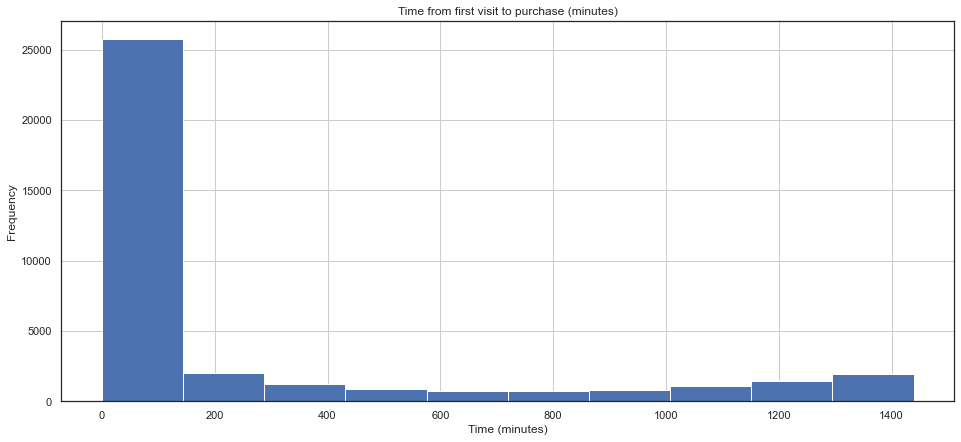

In [36]:
ax = buying_time['buying_time'].hist()
ax.set_xlabel('Time (minutes)')
ax.set_ylabel('Frequency')
ax.set_title('Time from first visit to purchase (minutes)')

Time from first visit to purchase:

- Average of 249 minutes

- By median 16 minutes

- By mode 1 minute

In most cases, the purchase occurs in the first minutes after the start of the session. Based on the shape of the distribution (not close to normal), the average measure is the mode.

#### 3.2.2 Average number of purchases per customer

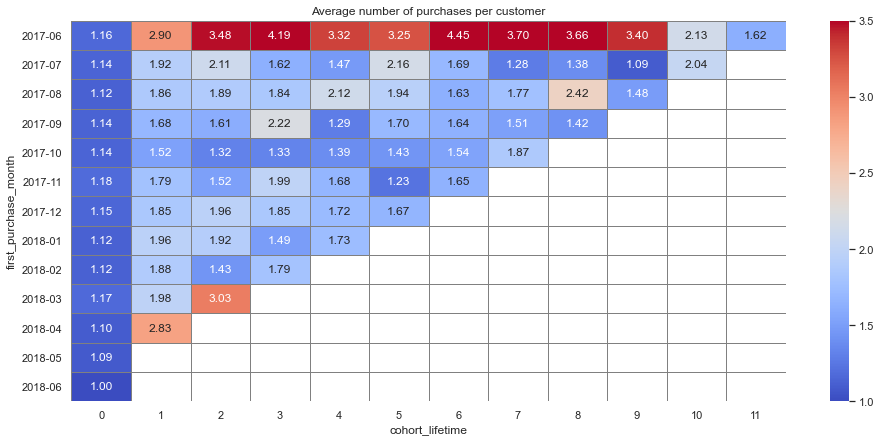

In [37]:
first_purchase_date = orders.groupby('uid').agg(
    {'purchase_time':'min'}
).rename(
    columns={'purchase_time':'first_purchase_date'}
)
orders_count = orders.merge(first_purchase_date, on='uid')
orders_count['first_purchase_month'] = orders_count['first_purchase_date'].astype('datetime64[M]')
orders_count['purchase_month'] = orders_count['purchase_time'].astype('datetime64[M]')
orders_count['cohort_lifetime'] = (
    orders_count['purchase_month'] - orders_count['first_purchase_month']
) / np.timedelta64(1, 'M')
orders_count['cohort_lifetime'] = orders_count['cohort_lifetime'].round().astype('int')
orders_count['first_purchase_month'] = orders_count['first_purchase_month'].dt.strftime('%Y-%m')
orders_grouped_by_cohorts = orders_count.groupby(
    ['first_purchase_month', 'cohort_lifetime']
).agg(
    {'purchase_month': 'count', 'uid': 'nunique'}
)
orders_grouped_by_cohorts['purchases_per_user'] = orders_grouped_by_cohorts['purchase_month'] / orders_grouped_by_cohorts['uid']
orders_grouped_by_cohorts = orders_grouped_by_cohorts.reset_index()
purchase_pivot = orders_grouped_by_cohorts.pivot_table(
    index='first_purchase_month',
    columns='cohort_lifetime',
    values='purchases_per_user')
purchase_pivot

purchase_pivot.cumsum(axis = 1).mean(axis = 0)
sns.set(style='white')
plt.figure()
plt.title('Average number of purchases per customer')
sns.heatmap(purchase_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='gray', cmap = 'coolwarm', vmin=1, vmax=3.5);

In general, the number of purchases may increase slightly over time, but not significantly

In [38]:
mean_orders_per_user = orders_grouped_by_cohorts['uid'].count()/orders_grouped_by_cohorts['uid'].nunique()
print("Average number of purchases per user {0:.2f} ".format(mean_orders_per_user))

Average number of purchases per user 1.22 


**Interim conclusion:**

Users rarely make a second purchase, something stops them

#### 3.2.3 Average receipt

In [39]:
orders_and_visits = orders.merge(first_visit)
orders_and_visits['purchase_date'] = orders_and_visits['purchase_time'].dt.date
orders_and_visits['purchases_week'] = orders_and_visits['purchase_time'].dt.week
orders_and_visits['purchase_month'] = orders_and_visits['purchase_time'].dt.month

In [40]:
orders_and_visits['revenue'].describe()

count    50415.000000
mean         4.999647
std         21.818359
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: revenue, dtype: float64

Average receipt - 5 c.u.

In [41]:
mean_purchase_by_month = orders_and_visits.groupby('purchase_month').agg({'revenue': 'mean'})

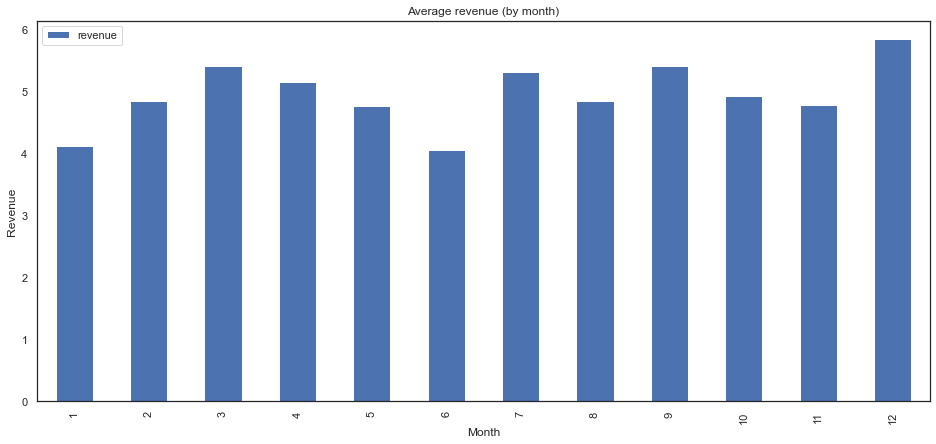

In [42]:
ax = mean_purchase_by_month.plot(kind='bar')
plt.title('Average revenue (by month)')
ax.set_xlabel('Month')
ax.set_ylabel('Revenue')
plt.show()

Revenue ranges from 4 to 6 thousand, with December being the most profitable month

#### 3.2.4 LTV

In [43]:
orders['order_month'] = orders['purchase_time'].astype('datetime64[M]')

first_order = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_order.columns = ['uid', 'first_order_month']

cohort_sizes = first_order.groupby('first_order_month').agg({'uid':'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']

orders_new = pd.merge(orders, first_order, on='uid')

cohorts = orders_new.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()

report = pd.merge(cohort_sizes, cohorts, on='first_order_month')

In [44]:
margin_rate = 1
    
report['gp'] = report['revenue'] * margin_rate
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

report['ltv'] = report['gp'] / report['n_buyers']

In [45]:
ltv_cohorts = report.groupby('first_order_month').agg({'ltv': 'sum'}).reset_index()

In [46]:
output = report.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='mean')
output = output.cumsum(axis=1).round(2) 

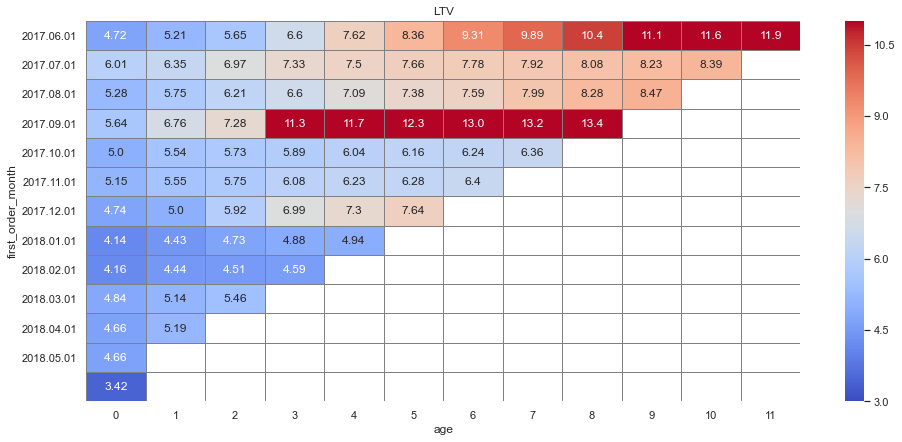

In [47]:
sns.set(style='white')
plt.figure()
plt.title('LTV')
sns.heatmap(output, annot=True, fmt='.3', linewidths=1, linecolor='gray', vmin = 3, vmax = 11, 
            cmap = 'coolwarm', yticklabels=retention_pivot.index.strftime('%Y.%m.%d'));

LTV increases over time

In [48]:
report_six_month = report[report['first_order_month'] <= '2017-11-01']
report_six_month = report_six_month[report_six_month['age'] <= 6]

output_six_month = report_six_month.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='mean')
output_six_month = output_six_month.cumsum(axis=1).round(2) 

ltv_six_month = report_six_month.groupby('first_order_month').agg({'ltv': 'sum'}).reset_index()
ltv_six_month_mean = ltv_six_month['ltv'].mean()
print("Average LTV for six months {0:.2f} ".format(ltv_six_month_mean))

Average LTV for six months 8.39 


### 3.3 Marketing metrics

#### 3.3.1 Total marketing costs

In [49]:
marketing_costs = costs.groupby('source_id').agg({'costs': 'sum'}).reset_index()
display(marketing_costs)

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [50]:
marketing_costs.sum()

source_id        34.00
costs        329131.62
dtype: float64

Total marketing costs 329 131,62 c.u.

In [51]:
costs['month'] = costs['dt'].astype('datetime64[M]')
marketing_costs_by_month = costs.groupby(['source_id', 'month']).agg({'costs': 'sum'}).reset_index()

In [52]:
month_lst = ['June', 'July', 'August', 'September', 'October', 'November', \
             'December', 'January', 'February', 'March', 'April', 'May']

In [53]:
costs_by_source_month = marketing_costs_by_month.groupby('source_id')['costs'].sum().reset_index()

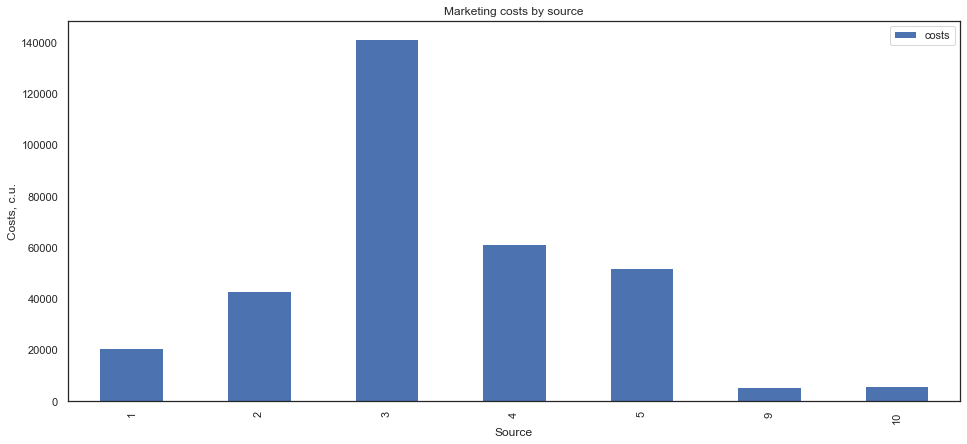

In [54]:
ax = costs_by_source_month.plot(x="source_id", y="costs", kind='bar')
plt.title('Marketing costs by source')
ax.set_xlabel('Source')
ax.set_ylabel('Costs, c.u.')
plt.show()

The most expensive source is 3, which exceeds the total marketing costs of sources 1, 2, 9, and 10

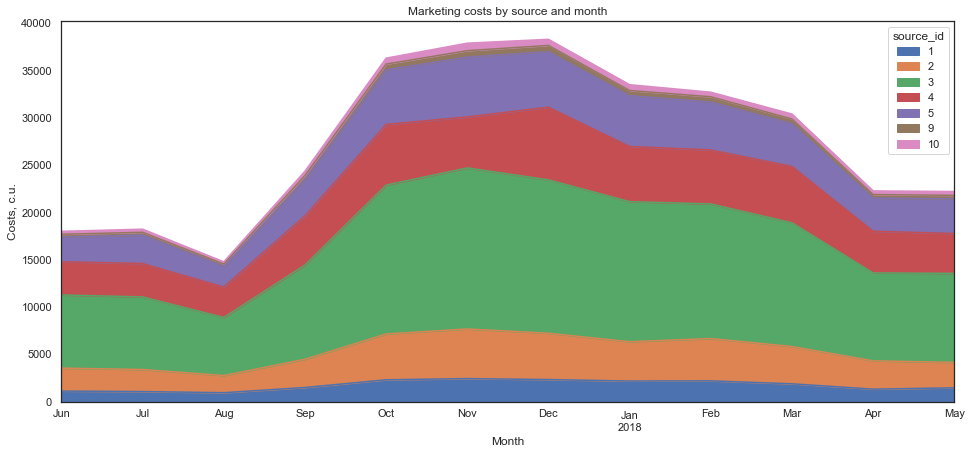

In [55]:
ax = marketing_costs_by_month.pivot_table(index='month', columns='source_id', values='costs', aggfunc='sum')\
.plot(kind='area')
plt.title('Marketing costs by source and month')
ax.set_xlabel('Month')
ax.set_ylabel('Costs, c.u.')
plt.show()

Marketing expenses total 329,131.62 and are distributed across 7 sources.
The most costly month is December, the most costly source is 3

#### 3.3.2 Average CAC per customer

In [56]:
marketing_costs = marketing_costs_by_month.groupby('month')['costs'].sum().reset_index()

In [57]:
uid_count = orders.groupby('order_month')['uid'].nunique().reset_index()
uid_count.columns = ['order_month', 'uid_count']

In [58]:
report_costs = pd.merge(uid_count, marketing_costs, left_on='order_month', right_on='month', how='left')
report_costs['cac'] = (report_costs['costs'] / report_costs['uid_count']).round(2)

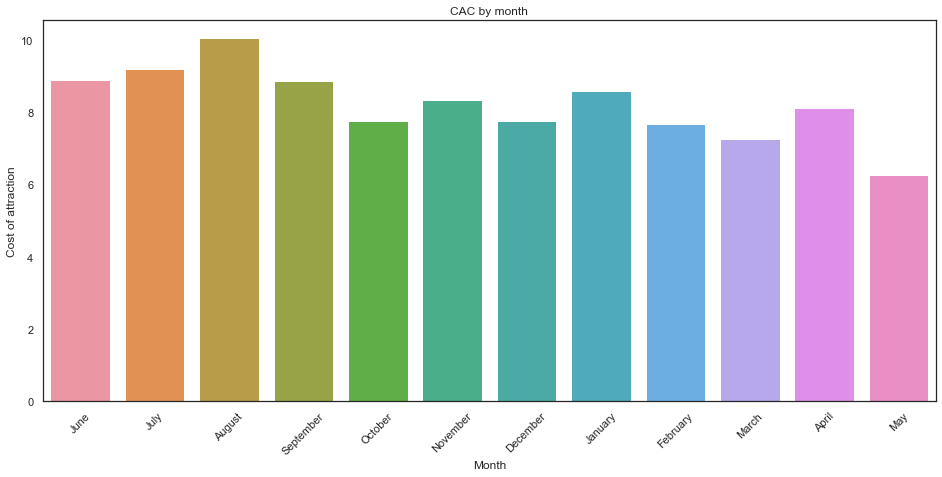

In [59]:
plt.figure()
ax = sns.barplot(x="month", y="cac", data=report_costs)
ax.set_xticklabels(month_lst, rotation=45)
plt.title('CAC by month')
ax.set_xlabel('Month')
ax.set_ylabel('Cost of attraction')
plt.show()

The cost of attracting a buyer is rising, peaking in August, then falling smoothly with small spikes in November, January and April.

In [60]:
first_visit = visits.groupby(['uid'])['session_start'].min().reset_index()
first_visit.columns = ['uid', 'first_visit']
visits = visits.merge(first_visit)

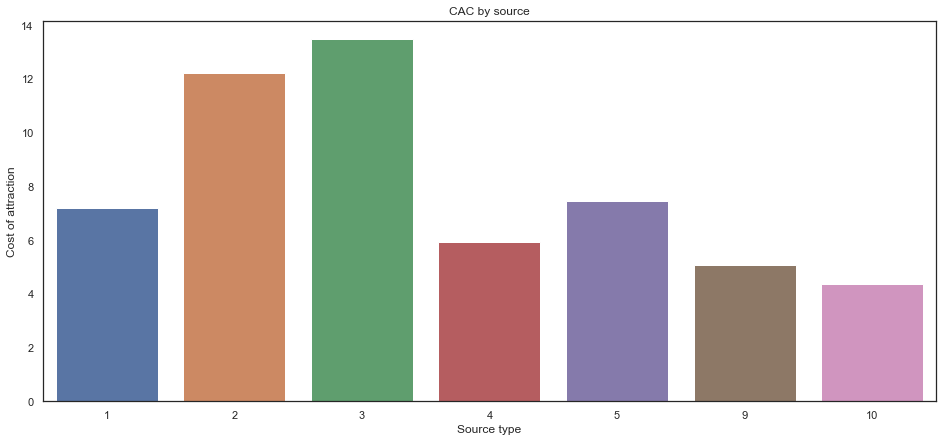

In [61]:
costs_by_source = costs.groupby('source_id').agg({'costs':'sum'}).reset_index()

visits_by_source = visits.query('session_start == first_visit')
customers_by_source = (orders.merge(visits_by_source, on='uid', how='inner')).groupby('source_id').agg({'uid':'nunique'})\
                        .rename(columns={'uid':'customers'}).reset_index()

cac = customers_by_source.merge(costs_by_source, on='source_id').reset_index()
cac = cac.fillna(0)

cac['cac'] = cac['costs'] / cac['customers']
cac.sort_values('cac', ascending = False)

plt.figure()
ax = sns.barplot(x="source_id", y="cac", data=cac)
plt.title('CAC by source')
ax.set_xlabel('Source type')
ax.set_ylabel('Cost of attraction')
plt.show()

The second and third sources have the highest cost of attraction, with the third source requiring the highest costs, and the second is the 4th most costly. Then go 1 and 5 sources, with close values of costs

In [62]:
cac_mean = cac['cac'].mean()
print('The average CAC is: {0:.2f}'.format(cac_mean))

The average CAC is: 7.96


#### 3.3.3 by cohorts

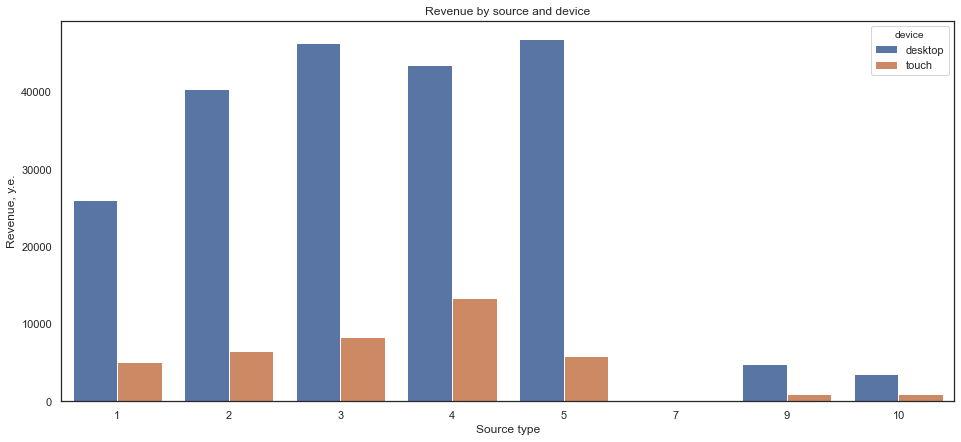

In [63]:
revenue_by_source = (orders.merge(visits_by_source, on='uid', how='inner')).groupby('source_id').agg({'revenue':'sum'}).reset_index()

romi = revenue_by_source.merge(costs_by_source, on='source_id')
romi['romi'] = (romi['revenue'] - romi['costs']) / romi['costs']

revenue_by_source_and_device = (orders.merge(visits_by_source, on='uid', how='inner'))\
                                .groupby(['source_id', 'device']).agg({'revenue':'sum'}).reset_index()

plt.figure()
ax = sns.barplot(x="source_id", y="revenue", hue="device", data=revenue_by_source_and_device)
plt.title('Revenue by source and device')
ax.set_xlabel('Source type')
ax.set_ylabel('Revenue, у.е.')
plt.show()

Profit from sources by device:

- Computers: the most profitable sources are 2, 3, 4, 5, with figures of more than 40 thousand c.u., then comes source 1 with a figure of 25 thousand c.u., and separately sources 9 and 10 with a profit of about 5 thousand c.u. are distinguished.

- Mobile devices: the most profitable source is source 4 with an indicator of 13 thousand c.u., then comes the group of 1, 2, 3 and 5 with an indicator from 5 to 7 thousand c.u. and separately also sources 9 and 10 with indicators of 1 thousand c.u.

In [64]:
romi.sort_values('romi', ascending = False)

,source_id,revenue,costs,romi
0,1,31090.55,20833.27,0.492351
1,2,46923.61,42806.04,0.096191
5,9,5759.40,5517.49,0.043844
4,5,52624.02,51757.10,0.016750
3,4,56696.83,61073.60,-0.071664
6,10,4450.33,5822.49,-0.235665
2,3,54511.24,141321.63,-0.614275


Sources 4, 10 and 3 have a negative value of return on investment in marketing, thereby showing their insolvency. At the same time, the most profitable source is 1. 

# 4. General conclusion

- **A brief review of the work performed:** a little preprocessing of the data was done, in general the quality of the data was satisfactory. Product metrics were calculated, the amount of time spent on the site, a cohort analysis of the return index. E-commerce metrics were calculated - the average check, the average number of purchases, the lifetime value of the customer. And marketing metrics were also calculated - cost of customer acquisition, marketing ROI.
- **Main conclusions:** when analyzing Yandex.Afisha it can be said that mobile devices have very low revenue indicators relative to computers. Particular attention to sources 9 and 10 - we need to understand the reasons for low income. The most profitable sources are 1, 2, 9 and 5. And the most financially burdensome source 3, perhaps on it you can cut costs without reducing CAC. In general, you should pay more attention to the mobile app, why it is such a low income, perhaps awkward interface or a lot of bugs - more tests are needed. The most profitable months - the end of autumn-beginning of winter, people start buying gifts for the New Year, often it may be tickets to events. Spending on marketing peaks in December, and the cost per customer in this month is closer to the lower boundary of this indicator - people succumb to advertising without much opposition. Despite the abundance of summer festivals - summer remains a dead season compared to the rest. Also users make purchases during the first minutes of using the service, but mostly the number does not come back for a second purchase - the reasons should be investigated.